#### Convolutions
Convolution is an operation (weighted averaging) involving some dimension of input and a kernal which maps that input into some other dimensional output.  Some examples are:

An echo is a lower amplitude version of a signal added to itself with a time delay:
$$
x(t) = \sum_m w_m s(t-t_m)
$$
where x is the new output, weights w change the amplitude, and the time delay is added to the signal s.  For continuous signals, the equivalent is the integral:
$$
w(t)*x(t)=\int w(y)x(t-y)dy = \int w(t-z)x(z) dz ; \qquad z:=t-y
$$
with the latter change of variable showing that in the integral it does not matter which term is the filter and which is the signal.  
For actual echos from soundfiles, scipy and wave allow for import and writing of wav files, and numpy has a convolve function.

For two dimensional convolutions, scipy signal has a guassian blur filter that can be applied to images, or other things.  The sobel operator is an edge detector, differentiating between horizonal regions of different value.

For an image, the input may be HxWxC for height, width and color, and the convolution is a stack of F different CxKxK filters, so CxKxKxF.  As each filter moves over the image, it produces (with padding) an output image of size HxW, so the total output dimension is HxWxF.

In general, a convolution is a way of incorporating local knowledge of a point into the (revised) value of that point.  A convolutional NN is a sequence of convolution (filters) followed by a function combining values from the filters. 

Convolution modes include valid (stayy inside original data), full (use padding to get every value from the original data), and same (use padding to make the input and output size the same).

For max pooling, just take the largest value within the pool (continguous group of cells).  We only pool over spatial dimensions, not over features.
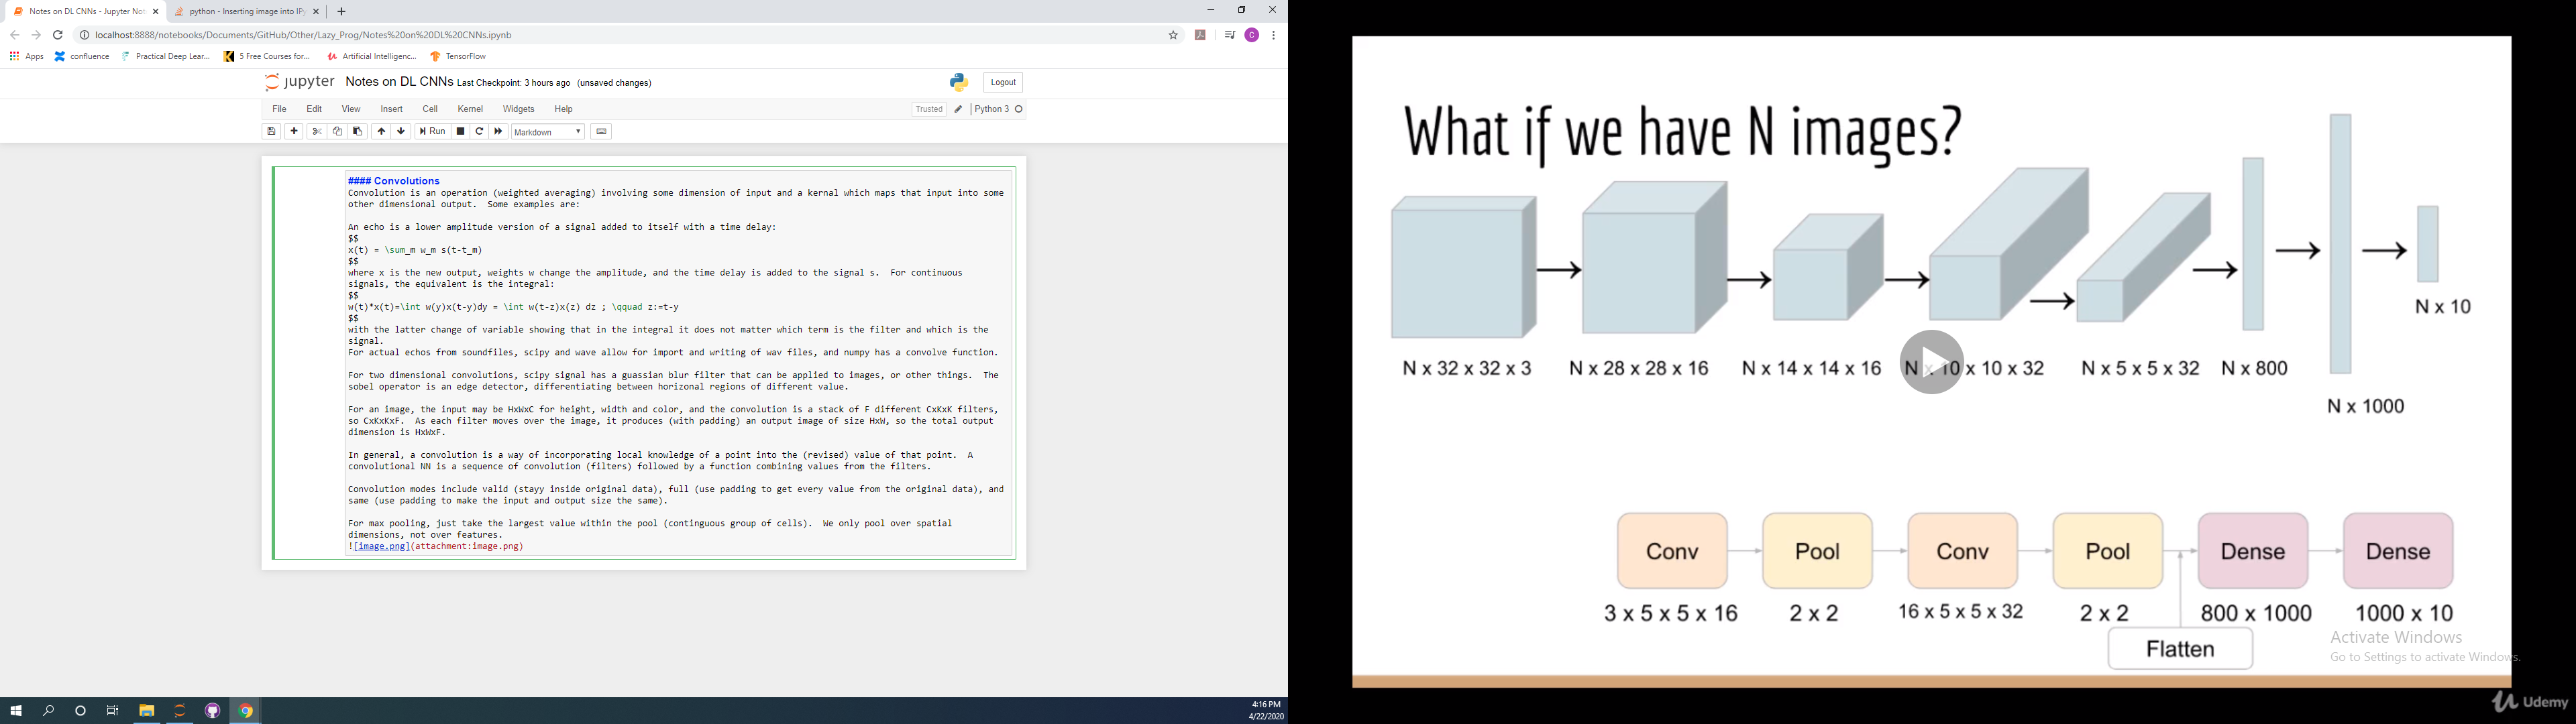

Filter sizes and number of features are an art, generally imitated from other successful efforts.

For backpropogation with convolution and pooling, you can update the pooling layers by updating whichever cell was the max, and for convolution, the partial will just be the value next to the weight term being updated.

Advanced CNNS
VGG Visual geometry group won competition for localization (draw bounding box) and classification (label) in 2014.  The VGG architecture uses 3x3 convolutions and pooling to go from size 224 to size 7 while the number of convolutions goes from 64 to 512, followed by three 4096 fully connected layers.  There are multiple convolutional layers before pooling. (image https://www.geeksforgeeks.org/vgg-16-cnn-model/).  We can adopt the feature transformation aspects of VGG and adopt them for out own purposes by chopping off the classification part of the NN and adding our own classifier on top.  VGG seems to work well for this.

ResNet:  In theory, you can always make a network better by making it deeper, because unneeded layers can simply become the identity function if not required.  In practice, this does not work because you have to train everything at once.  However, you can train a network to be an identity by passing it the input, like with an autoencoder.  In practice, it is easier to learn that F(x)-x should be zero, i.e. focusing on the residual.  So a residual block consists of two paths: 1) X goes to the end, 2) X goes through three layers (transform, relu, transform) to arrive at the end, and then add in the original X and do a RELU.  The authors also apply batch-norming to each layer in the main branch.  There is a second kind of residual consisting of convolution and batchnorm rather than identity.  Note the last output must be the same size as the input, or scaled to be so.
The resnet architecture starts with a convolution block, and then breaks down into a sequence of resnet blocks.

Object detection -- SSD single shot multibox detector.  Object localization (where is the object and what is it) requires linear regression rather than just classification.  It starts with some state of the art classifier, and appends linear regression to it.  For classication, we used cross entropy, binary for there being an object, and catagorical for image labeling, and for position we use mean squared error of L1.  We need a single cost function, which we can use as the weighted sum of the binary, catagorical, and bounding box losses.  Object detection (is there an object there) requires a search throughout the image, which could be time consuming if done wrong.  The useful observation is that convolution preserves (some) locality information, so by replacing dense layers with convolution, that information can be preserved, and with the same number or parameters.  Take four windows of the original image, pass them through the convolutions, ending with a 2x2x3 layer within which you can distinguish four 1x1x3s corresponding to the original four windows.  This approach keeps us from having to loop over the image, but now we have to deal with scale.  To do this, we think of subsections of the cnn as feature extractors, dealing with objects at different scales.    Each set of layers feeds into the class and box predictor, and is then downsampled and sent to the next level.  After dealing with scale, the next problem is dimentsion, of shape.  different objects are different shapes.  SSD copes with this by using many windows in a series of default positions.  These default boxes are applied at every scale.  So we use each window at each scale.

Neural style transfer:  The idea is to take a content image and a style image, and then pass them through a cnn, along with a target image.  Then optimize the target image so that, at the appropriate convolutional layer(s), the target image is close to the content image, while also being close to the style image.  The closeness is measured by the gram matrix.  At the chosen level of the cnn, take the HxWxC image, where H,W refer to the space of the original input and C is the depth of the convolutions, and unroll it into a HWxC matix, with one spatial dimention and another representing features.  Then take this matrix, M, and calculate the normalized gram matrix $G=N^{-1} MM^T$.  The gram matrix $MM^T$ is the matrix formed by the inner product of the column/row vectors of M, arranged so that the output is CxC.  Thus the entry i,j of the resulting matrix is the inner product of the set of convolutions corresponding to some spatial point (area).  So at a given local region of target image, distances in the convolution (feature) space must be preserved. This is also the autocorrelation matrix, the correlation the features have with one another.  For the style image, you may take the gram matrix at many convolutional layers, respresenting features at different scales.

Class activation maps:  As the image passes through teh cnn, the spatial dimensions shrink, but the number of features increas.  Assuming we use relu, features are nonnegative at every layer.  Each feature relates to a position on the original image, so can be traced back to a region on the image.  For the classification layer, if a weight (like for logistic regression) is greater than 0, then the feature is positively correlated with the class. So you take the features most highly correlated with the class, and trace their activation back to the last convolutional layer.  Then scale up to the original image and overlay this on the original image.